In [1]:
import os
os.environ['PYTHONHASHSEED']= '0'
os.environ['CUDA_VISIBLE_DEVICES']='-1'
os.environ['TF_CUDNN_USE_AUTOTUNE'] ='0'

import pandas as pd
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import pandas.core.datetools as dt

import yfinance as yf
from yahoofinancials import YahooFinancials

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from tensorflow.keras import layers,Model, optimizers



%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

import statistics 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from statsmodels.robust import mad

In [2]:
bse_small_ = ['ATGL.NS', 'SRF.BO', 'MINDTREE.BO', 'LAURUSLABS.BO', 'GUJGASLTD.NS']
bse_mid_ = ['ADANIENT.BO', 'ADANIGREEN.NS', 'BERGEPAINT.BO', 'LT.BO', 'MUTHOOTFIN.BO']
bse_large_ = ['TCS.BO', 'HDFCBANK.BO', 'INFY.BO', 'HINDUNILVR.BO', 'WIPRO.BO']
 
bse_small = yf.download(bse_small_, 
                      start='2017-04-01', 
                      end='2020-12-31', 
                      progress=False)
bse_mid = yf.download(bse_mid_, 
                      start='2017-04-01', 
                      end='2020-12-31', 
                      progress=False)
bse_large = yf.download(bse_large_, 
                    start='2017-04-01', 
                      end='2020-12-31', 
                      progress=False)

bse_mid.head()

Adj Close                                                         \
           ADANIENT.BO ADANIGREEN.NS BERGEPAINT.BO        LT.BO MUTHOOTFIN.BO   
Date                                                                            
2017-04-03   61.470131           NaN    239.717499   998.872192    348.957520   
2017-04-05   63.011703           NaN    238.796982  1020.646240    363.411377   
2017-04-06   63.562260           NaN    234.388275  1012.105164    349.599945   
2017-04-07   64.608322           NaN    230.657837  1014.420776    346.755035   
2017-04-10   66.012253           NaN    227.847885  1007.323181    344.414856   

                 Close                                                         \
           ADANIENT.BO ADANIGREEN.NS BERGEPAINT.BO        LT.BO MUTHOOTFIN.BO   
Date                                                                            
2017-04-03   62.666912           NaN    247.399994  1107.099976    380.250000   
2017-04-05   64.238495           NaN    246.449997  1131.233276    396.000000   
2017-04-06   64.799774           NaN    241.899994  1121.766724    380.950012   
2017-04-07   65.866203           NaN    238.050003  1124.333374    377.850006   
2017-04-10   67.297470           NaN    235.149994  1116.466675    375.299988   

            ...        Open                                           \
            ... ADANIENT.BO ADANIGREEN.NS BERGEPAINT.BO        LT.BO   
Date        ...                                                        
2017-04-03  ...   59.776318           NaN    242.000000  1052.000000   
2017-04-05  ...   62.751102           NaN    247.000000  1107.533325   
2017-04-06  ...   64.098175           NaN    246.000000  1125.199951   
2017-04-07  ...   63.480766           NaN    241.050003  1116.533325   
2017-04-10  ...   66.202972           NaN    237.050003  1123.400024   

                              Volume                                      \
           MUTHOOTFIN.BO ADANIENT.BO ADANIGREEN.NS BERGEPAINT.BO   LT.BO   
Date                                                                       
2017-04-03    371.000000      995332           NaN        116440  765204   
2017-04-05    380.250000      911409           NaN        450487  341658   
2017-04-06    399.000000     1162895           NaN        288140  176827   
2017-04-07    372.850006     1379409           NaN         68684  658531   
2017-04-10    380.000000     1132652           NaN         35686  153624   

                          
           MUTHOOTFIN.BO  
Date                      
2017-04-03         62536  
2017-04-05        100629  
2017-04-06         58432  
2017-04-07         46688  
2017-04-10         17890  

[5 rows x 30 columns]

In [6]:
bse_small_t = yf.download(bse_small_, 
                      start='2021-01-01', 
                      end='2021-07-29', 
                      progress=False)
bse_mid_t = yf.download(bse_mid_, 
                      start='2021-01-01', 
                      end='2021-07-29', 
                      progress=False)
bse_large_t = yf.download(bse_large_, 
                      start='2021-01-01', 
                      end='2021-07-29', 
                      progress=False)

In [7]:
bse = [bse_small, bse_mid, bse_large]

In [8]:
for m in bse:
    for k in ('Adj Close','Close'):
        for j in m[k].columns:
            for i in range(len(m[k][j])-7):
                data = m[k][j][i:i+7]
                mean = np.mean(np.array(data))
                st = np.std(np.array(data))
                if (m[k][j][i+7] > (mean + 3*st) or m[k][j][i+7] < (mean - 3*st)):
                    m[k][j][i+7] = mean
                    


C:\Users\hp\anaconda3\envs\tensorenviron\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [624]:
k = 'GUJGASLTD.NS'

nifty = bse_small_t['Close'][k]
nifty_1 = bse_small_t['Adj Close'][k]

nifty_2 = bse_small['Close'][k]

nifty.head()

Date
2021-01-01    378.000000
2021-01-04    379.350006
2021-01-05    389.549988
2021-01-06    386.299988
2021-01-07    386.850006
Name: GUJGASLTD.NS, dtype: float64

In [625]:
import pywt
from pywt import wavedec, waverec

def waveletSmooth( x, wavelet="haar", level=2, declevel=2):
    # calculate the wavelet coefficients
    coeff = pywt.wavedec( x, wavelet, mode='periodization',level=declevel,axis=0 )
    # calculate a threshold
    sigma = mad(coeff[-level])
    #print("sigma: ",sigma)
    uthresh = sigma * np.sqrt( 2*np.log( len( x ) ) )
    #print("uthresh: ", uthresh)
    coeff[1:] = ( pywt.threshold( i, value=uthresh, mode="hard" ) for i in coeff[1:] )
    # reconstruct the signal using the thresholded coefficients
    y = pywt.waverec( coeff, wavelet, mode='periodization',axis=0 )
    return y

scaler = preprocessing.RobustScaler()

X_train = np.array(nifty_2.dropna()).reshape(-1,1)
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled_denoised = waveletSmooth(X_train_scaled)


In [626]:
# from keras.models import load_model
# model = load_model('model_1_5_wav.h5')

In [627]:
#plt.plot(bse_large_t['Close']['INFY.BO'])

Epoch 1/1500
13/13 - 0s - loss: 0.1859 - mae: 0.2773 - mse: 0.1859 - val_loss: 3.6468 - val_mae: 1.6553 - val_mse: 3.6468
Epoch 2/1500
13/13 - 0s - loss: 0.3744 - mae: 0.3886 - mse: 0.3744 - val_loss: 11.4001 - val_mae: 3.0209 - val_mse: 11.4001
Epoch 3/1500
13/13 - 0s - loss: 0.0176 - mae: 0.0935 - mse: 0.0176 - val_loss: 3.4117 - val_mae: 1.5958 - val_mse: 3.4117
Epoch 4/1500
13/13 - 0s - loss: 0.0096 - mae: 0.0743 - mse: 0.0096 - val_loss: 3.6456 - val_mae: 1.6706 - val_mse: 3.6456
Epoch 5/1500
13/13 - 0s - loss: 0.0057 - mae: 0.0510 - mse: 0.0057 - val_loss: 2.3737 - val_mae: 1.3229 - val_mse: 2.3737
Epoch 6/1500
13/13 - 0s - loss: 0.0016 - mae: 0.0266 - mse: 0.0016 - val_loss: 2.2443 - val_mae: 1.2874 - val_mse: 2.2443
Epoch 7/1500
13/13 - 0s - loss: 0.0015 - mae: 0.0256 - mse: 0.0015 - val_loss: 2.1142 - val_mae: 1.2443 - val_mse: 2.1142
Epoch 8/1500
13/13 - 0s - loss: 0.0016 - mae: 0.0259 - mse: 0.0016 - val_loss: 1.8693 - val_mae: 1.1551 - val_mse: 1.8693
Epoch 9/1500
13/13 - 0

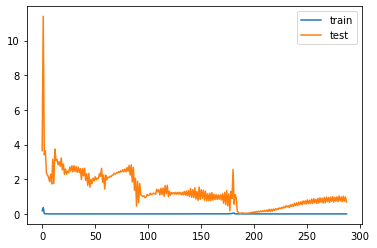

In [628]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 7
X_train = X_train_scaled_denoised
X, y = split_sequence(X_train, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
X_train, y_train = X,y
opt = keras.optimizers.Adam(learning_rate=0.001)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,  patience=100)

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(100, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=100), input_shape=(n_steps,1)))
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=100)))
model.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed=100)))
model.add(tf.keras.layers.Dense(1))

model_1=Sequential()
model_1.add(LSTM(40,return_sequences=True, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=100), input_shape=(n_steps,1)))
#model_1.add(LSTM(50,return_sequences=True, activation='relu', kernel_initializer='he_normal'))
model_1.add(LSTM(50, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=100)))
model_1.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=100)))
#model_1.add(tf.keras.layers.Dense(50, activation='relu', kernel_initializer='he_normal'))
model_1.add(Dense(1))

model_2 = keras.Sequential()
model_2.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', batch_input_shape=(None, 7, 1), return_sequences=True, name='encoder_1'))
model_2.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model_2.add(keras.layers.LSTM(1, kernel_initializer='he_uniform', return_sequences=False, name='encoder_3'))
model_2.add(keras.layers.RepeatVector(7, name='encoder_decoder_bridge'))
model_2.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model_2.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model_2.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model_2.add(keras.layers.TimeDistributed(keras.layers.Dense(1)))


model.compile(optimizer=opt, loss='mse', metrics=['mae', 'mse'])
model_1.compile(optimizer=opt, loss='mse', metrics=['mae'])
model_2.compile(optimizer=opt, loss='mse', metrics=['mae'])


history = model.fit(X_train, y_train, epochs=1500, batch_size=50, verbose=2, shuffle = False, validation_split=0.3, callbacks=[es])
#model_1.fit(X_train, y_train, epochs=1500, batch_size=50, verbose=2)
#model_2.fit(X_train, X_train, epochs=200, batch_size=50, verbose=2)

encoder = Model(inputs=model_2.inputs, outputs=model_2.layers[2].output)
train_encoded = encoder.predict(X_train)
l1 = []
for i in range(X_train.shape[0]):
    l1.append(X_train[i][-1])
X_enc = pd.DataFrame(l1)
X1_enc = pd.DataFrame(train_encoded)
X_enc['enc'] = X1_enc[0]

mlp_model = Sequential()
mlp_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu', input_dim=X_enc.shape[1]))
mlp_model.add(Dense(10, kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dense(1))

mlp_model.compile(loss='mse', optimizer=opt)
#mlp_model.fit(X_enc, y_train, epochs=200, batch_size=50,verbose=2)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [629]:
#model = model_1

short_window = 4
long_window = 35
window = 6

#nifty = Gold

signals = pd.DataFrame(index=nifty.index)

signals['signal'] = 0.0

signals['short_mavg'] = nifty.rolling(window=short_window, min_periods=1, center=False).mean()
modPrice = nifty.copy()
modPrice.iloc[0:short_window] = signals['short_mavg'][0:short_window]
ema10alt = modPrice.ewm(span=short_window, adjust=False).mean()
signals['short_eavg'] = ema10alt

signals['long_mavg'] = nifty.rolling(window=long_window, min_periods=1, center=False).mean()
modPrice = nifty.copy()
modPrice.iloc[0:long_window] = signals['long_mavg'][0:long_window]
ema10alt = modPrice.ewm(span=long_window, adjust=False).mean()
signals['long_eavg'] = ema10alt

signals['macd_line'] = signals['short_eavg'] - signals['long_eavg'] 

signals['mvg_macd_line'] = signals['macd_line'].rolling(window=window, min_periods=1, center=False).mean()
modPrice = signals['macd_line'].copy()
modPrice.iloc[0:window] = signals['mvg_macd_line'][0:window]
ema10alt = modPrice.ewm(span=window, adjust=False).mean()
signals['signal_line']  = ema10alt


signals['signal'][long_window:] = np.where(signals['macd_line'][long_window:] > signals['signal_line'][long_window:], 
                                            1.0, 0.0)  

signals['positions'] = signals['signal'].diff()

initial_capital= float(1000000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['NIFTYBEES'] = signals['signal']

portfolio = positions['NIFTYBEES'].multiply(nifty_1, axis=0)
portfolio = pd.DataFrame(portfolio)
portfolio.columns = ['NIFTYBEES']
portfolio['holdings'] = portfolio.sum(axis=1)

pos_diff = positions['NIFTYBEES'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio['cash'] = initial_capital - (pos_diff['NIFTYBEES'].multiply(nifty_1, axis=0)).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

portfolio.tail(20)

,NIFTYBEES,holdings,cash,total,returns
Date,,,,,
2021-06-30,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-01,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-02,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-05,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-06,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-07,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-08,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-09,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000
2021-07-12,0.000000,0.000000,1.000109e+06,1.000109e+06,0.000000


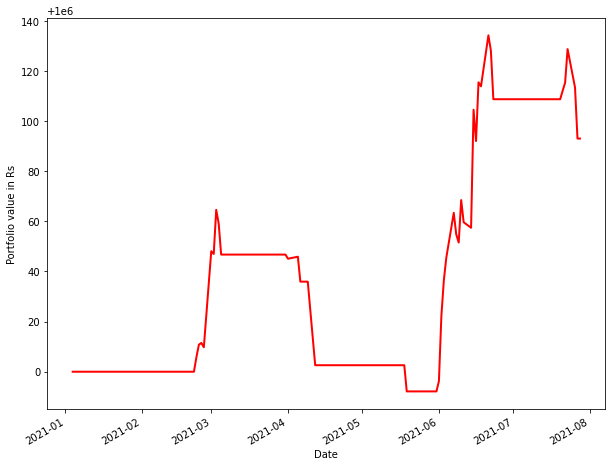

In [630]:
portfolio.tail(20)

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars


portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [631]:
portfolio['total'][-1] - 1000000

93.050048828125

In [632]:
from tensorflow.keras.models import load_model
#model = load_model('model_1.h5')

X_test = np.array(nifty)

X_train = X_test.reshape(-1,1)
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled_denoised = waveletSmooth(X_train_scaled)
X_test = X_train_scaled_denoised

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 7
X, y = split_sequence(X_test, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test, y_test = X,y

y_pred = model.predict(X_test)
y_pred_1 = y_pred.reshape(X_test.shape[0])

y_pred_2 = []
for i in range(X_test.shape[0] - 1):
    y_pred_2.append(y_pred_1[i+1]>y_pred_1[i])
y_pred_2.append(0)

mae = mean_absolute_error(y_test, y_pred_1)
rmse = mean_squared_error(y_test, y_pred_1, squared=False)

print("mae: ", mae, "rmse: ", rmse)

signals_1 = pd.DataFrame(index=nifty.index)
signals_1['signal'] = 0.0

signals_1['short_mavg'] = nifty.rolling(window=short_window, min_periods=1, center=False).mean()
modPrice = nifty.copy()
modPrice.iloc[0:short_window] = signals_1['short_mavg'][0:short_window]
ema10alt = modPrice.ewm(span=short_window, adjust=False).mean()
signals_1['short_eavg'] = ema10alt

signals_1['long_mavg'] = nifty.rolling(window=long_window, min_periods=1, center=False).mean()
modPrice = nifty.copy()
modPrice.iloc[0:long_window] = signals_1['long_mavg'][0:long_window]
ema10alt = modPrice.ewm(span=long_window, adjust=False).mean()
signals_1['long_eavg'] = ema10alt

signals_1['macd_line'] = signals_1['short_eavg'] - signals_1['long_eavg'] 

signals_1['mvg_macd_line'] = signals_1['macd_line'].rolling(window=window, min_periods=1, center=False).mean()
modPrice = signals_1['macd_line'].copy()
modPrice.iloc[0:window] = signals_1['mvg_macd_line'][0:window]
ema10alt = modPrice.ewm(span=window, adjust=False).mean()
signals_1['signal_line']  = ema10alt

signals_1['Pred_price'] = np.concatenate((np.zeros(6),np.int32(y_pred_2)),axis = 0)
signals_1['signal'][long_window:] = np.where(signals_1['macd_line'][long_window:] > signals_1['signal_line'][long_window:], 
                                            1.0, 0.0)  
sig = []
y = np.array(signals_1['signal'])
t = 0
for i in range(len(y)):
    if (y[i]==1.0 and signals_1['Pred_price'][i] == 1.0):
        t = 1
    if (y[i]==0.0 and signals_1['Pred_price'][i] == 0.0):
        t = 0
    sig.append(t)
    
signals_1['sig'] = sig
signals_1['positions'] = signals_1['sig'].diff()

initial_capital= float(1000000.0)

positions_1 = pd.DataFrame(index=signals.index).fillna(0.0)
#positions['Reliance'] = 100*signals['signal_R']
positions_1['NIFTYBEES.NS'] = signals_1['sig']

portfolio_1 = positions_1['NIFTYBEES.NS'].multiply(nifty_1, axis=0)
portfolio_1 = pd.DataFrame(portfolio_1)
portfolio_1.columns = ['NIFTYBEES.NS']

portfolio_1['holdings'] = portfolio_1.sum(axis=1)

pos_diff = positions_1['NIFTYBEES.NS'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio_1['cash'] = initial_capital - (pos_diff['NIFTYBEES.NS'].multiply(nifty_1, axis=0)).cumsum()
portfolio_1['total'] = portfolio_1['cash'] + portfolio_1['holdings']
portfolio_1['returns'] = portfolio_1['total'].pct_change()

portfolio_1.tail(20)

mae:  0.18505129209931168 rmse:  0.30136939199731755


,NIFTYBEES.NS,holdings,cash,total,returns
Date,,,,,
2021-06-30,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-01,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-02,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-05,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-06,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-07,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-08,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-09,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000
2021-07-12,0.000000,0.000000,1.000146e+06,1.000146e+06,0.000000


In [633]:
portfolio_1['total'][-1] - 1000000

130.550048828125

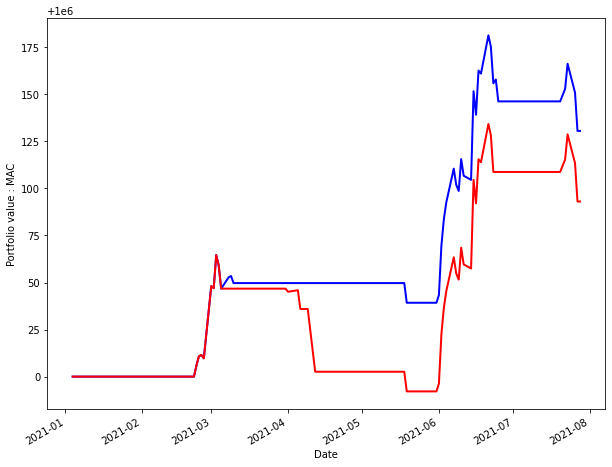

In [634]:

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value : MAC')

# Plot the equity curve in dollars

portfolio_1['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'b')

portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [635]:
net_return = portfolio_1['total'] - portfolio['total']

In [636]:
net_return

Date
2021-01-01     NaN
2021-01-04     0.0
2021-01-05     0.0
2021-01-06     0.0
2021-01-07     0.0
              ... 
2021-07-22    37.5
2021-07-23    37.5
2021-07-26    37.5
2021-07-27    37.5
2021-07-28    37.5
Name: total, Length: 141, dtype: float64

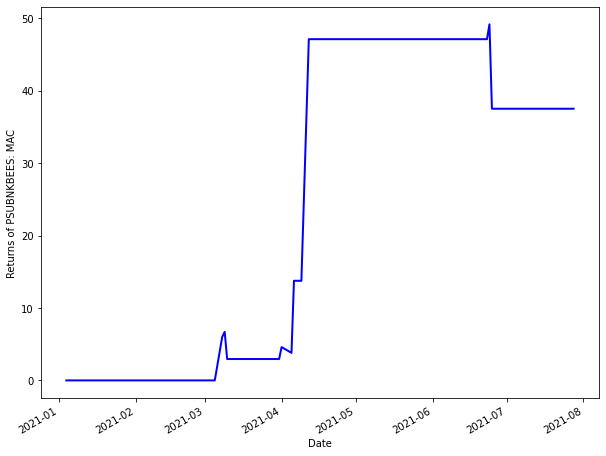

In [637]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Returns of PSUBNKBEES: MAC')

# Plot the equity curve in dollars

net_return.plot(ax=ax1, lw=2.,figsize=(10,8), color = 'b')


In [638]:
window = 6

signals = pd.DataFrame(index=nifty.index)

signals['signal'] = 0.0


signals['mavg'] = nifty.rolling(window=window, min_periods=1, center=False).mean()

modPrice = nifty.copy()
modPrice.iloc[0:window] = signals['mavg'][0:window]
ema10alt = modPrice.ewm(span=window, adjust=False).mean()

signals['eavg'] = ema10alt

signals['Close'] = nifty

signals['signal'][window:] = np.where(signals['Close'][window:] > signals['eavg'][window:], 
                                            1.0, 0.0)  

signals['positions'] = signals['signal'].diff()

initial_capital= float(1000000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['NIFTYBEES'] = signals['signal']

portfolio = positions['NIFTYBEES'].multiply(nifty_1, axis=0)
portfolio = pd.DataFrame(portfolio)
portfolio.columns = ['NIFTYBEES']
portfolio['holdings'] = portfolio.sum(axis=1)

pos_diff = positions['NIFTYBEES'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio['cash'] = initial_capital - (pos_diff['NIFTYBEES'].multiply(nifty_1, axis=0)).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

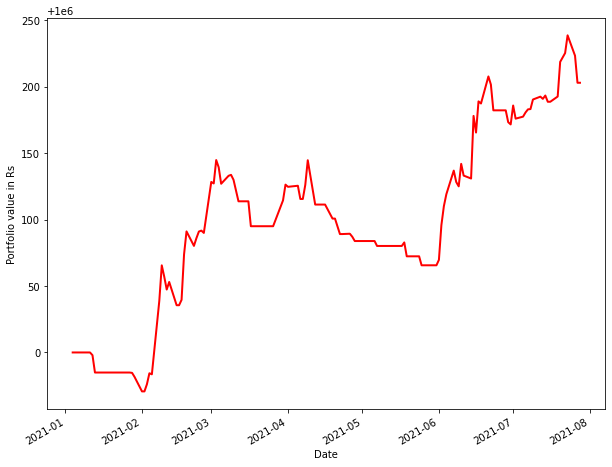

In [639]:
portfolio.tail(20)

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars

portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [640]:
portfolio['total'][-1] - 1000000

202.95004272460938

In [641]:
from tensorflow.keras.models import load_model
#model = load_model('model.h5')

X_test = np.array(nifty)

X_train = X_test.reshape(-1,1)
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled_denoised = waveletSmooth(X_train_scaled)
X_test = X_train_scaled_denoised


def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 7
X, y = split_sequence(X_test, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test, y_test = X,y

y_pred = model.predict(X_test)
y_pred_1 = y_pred.reshape(X_test.shape[0])

y_pred_2 = []
for i in range(X_test.shape[0] - 1):
    y_pred_2.append(y_pred_1[i+1]>y_pred_1[i])
y_pred_2.append(0)

signals_1 = pd.DataFrame(index=nifty.index)
signals_1['signal'] = 0.0

signals_1['mavg'] = nifty.rolling(window=window, min_periods=1, center=False).mean()

modPrice = nifty.copy()
modPrice.iloc[0:window] = signals_1['mavg'][0:window]
ema10alt = modPrice.ewm(span=window, adjust=False).mean()

signals_1['eavg'] = ema10alt

signals_1['Close'] = nifty
signals_1['Pred_price'] = np.concatenate((np.zeros(6),np.int32(y_pred_2)),axis = 0)
signals_1['signal'][window:] = np.where(signals_1['Close'][window:] > signals_1['eavg'][window:], 
                                            1.0, 0.0)  
sig = []
y = np.array(signals_1['signal'])
t = 0
for i in range(len(y)):
    if (y[i]==1.0 and signals_1['Pred_price'][i] == 1.0):
        t = 1
    if (y[i]==0.0 and signals_1['Pred_price'][i] == 0.0):
        t = 0
    sig.append(t)
    
signals_1['sig'] = sig
signals_1['positions'] = signals_1['sig'].diff()

initial_capital= float(1000000.0)

positions_1 = pd.DataFrame(index=signals.index).fillna(0.0)
#positions['Reliance'] = 100*signals['signal_R']
positions_1['NIFTYBEES.NS'] = signals_1['sig']

portfolio_1 = positions_1['NIFTYBEES.NS'].multiply(nifty_1, axis=0)
portfolio_1 = pd.DataFrame(portfolio_1)
portfolio_1.columns = ['NIFTYBEES.NS']

portfolio_1['holdings'] = portfolio_1.sum(axis=1)

pos_diff = positions_1['NIFTYBEES.NS'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio_1['cash'] = initial_capital - (pos_diff['NIFTYBEES.NS'].multiply(nifty_1, axis=0)).cumsum()
portfolio_1['total'] = portfolio_1['cash'] + portfolio_1['holdings']
portfolio_1['returns'] = portfolio_1['total'].pct_change()


In [642]:
portfolio_1['total'][-1] - 1000000

231.800048828125

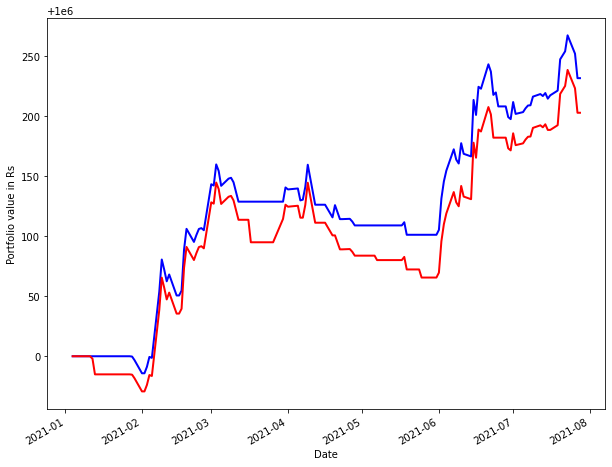

In [643]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars

portfolio_1['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'b')

portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

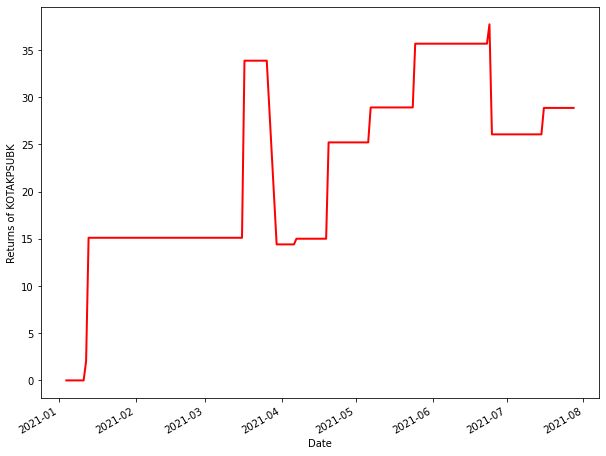

In [644]:
net_return_1 = portfolio_1['total'] - portfolio['total']

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Returns of KOTAKPSUBK')

# Plot the equity curve in dollars

#net_return.plot(ax=ax1, lw=2.,figsize=(10,8), color = 'b')

net_return_1.plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [645]:
window = 14

signals = pd.DataFrame(index=nifty.index)

signals['signal'] = 0.0


arr = np.array(nifty)[:-1]
arr = np.concatenate((np.zeros(1),arr),axis = 0)
arr_diff = nifty - arr
arr_diff[0] = 0
signals['daily_diff'] = arr_diff
signals['daily_gain'] = arr_diff
signals['daily_gain'][signals['daily_gain']<0] = 0
signals['daily_loss'] = arr_diff
signals['daily_loss'][signals['daily_loss']>0] = 0
signals['daily_loss'] = signals['daily_loss'].abs()

signals['gain_mavg'] = signals['daily_gain'].rolling(window=window, min_periods=1, center=False).mean()
signals['loss_mavg'] = signals['daily_loss'].rolling(window=window, min_periods=1, center=False).mean()
signals['rs'] = signals['gain_mavg']/signals['loss_mavg'] 
signals['rsi'] = 100 - 100/(1 + signals['rs'])

signals['signal'][window:] = np.where(signals['rsi'][window:] < 30, 
                                            1.0, 0.0)  

sig = []
y = np.array(signals['signal'])
t = 0
for i in range(len(y)):
    if (y[i]==1.0):
        t = 1
    if (signals['rsi'][i]>70):
        t = 0
    sig.append(t)
    
signals['sig'] = sig
signals['positions'] = signals['sig'].diff()

initial_capital= float(1000000.0)

positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['NIFTYBEES'] = signals['signal']

portfolio = positions['NIFTYBEES'].multiply(nifty_1, axis=0)
portfolio = pd.DataFrame(portfolio)
portfolio.columns = ['NIFTYBEES']
portfolio['holdings'] = portfolio.sum(axis=1)

pos_diff = positions['NIFTYBEES'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio['cash'] = initial_capital - (pos_diff['NIFTYBEES'].multiply(nifty_1, axis=0)).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

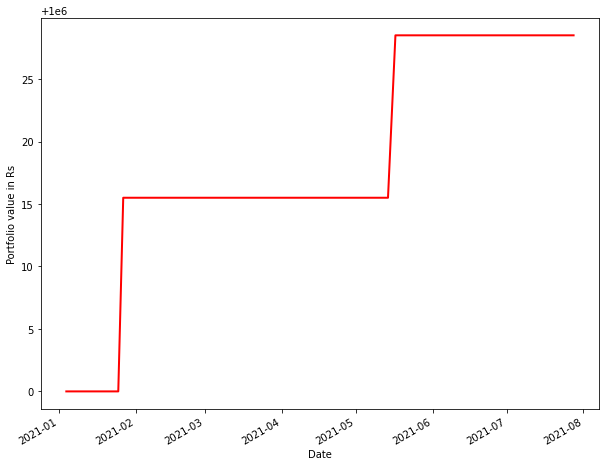

In [646]:
portfolio.tail(20)

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars

portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [647]:
portfolio['total'][-1] - 1000000

28.5

In [648]:
#window = 14

from tensorflow.keras.models import load_model
#model = load_model('model.h5')

X_test = np.array(nifty)

X_train = X_test.reshape(-1,1)
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled_denoised = waveletSmooth(X_train_scaled)
X_test = X_train_scaled_denoised


def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

n_steps = 7
X, y = split_sequence(X_test, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))
X_test, y_test = X,y

y_pred = model.predict(X_test)
y_pred_1 = y_pred.reshape(X_test.shape[0])

y_pred_2 = []
for i in range(X_test.shape[0] - 1):
    y_pred_2.append(y_pred_1[i+1]>y_pred_1[i])
y_pred_2.append(0)

signals = pd.DataFrame(index=nifty.index)

signals['signal'] = 0.0

arr = np.array(nifty)[:-1]
arr = np.concatenate((np.zeros(1),arr),axis = 0)
arr_diff = nifty - arr
arr_diff[0] = 0
signals['daily_diff'] = arr_diff
signals['daily_gain'] = arr_diff
signals['daily_gain'][signals['daily_gain']<0] = 0
signals['daily_loss'] = arr_diff
signals['daily_loss'][signals['daily_loss']>0] = 0
signals['daily_loss'] = signals['daily_loss'].abs()

signals['gain_mavg'] = signals['daily_gain'].rolling(window=window, min_periods=1, center=False).mean()
signals['loss_mavg'] = signals['daily_loss'].rolling(window=window, min_periods=1, center=False).mean()
signals['rs'] = signals['gain_mavg']/signals['loss_mavg'] 
signals['rsi'] = 100 - 100/(1 + signals['rs'])
signals['Pred_price'] = np.concatenate((np.zeros(6),np.int32(y_pred_2)),axis = 0)


signals['signal'][window:] = np.where(signals['rsi'][window:] < 30, 
                                            1.0, 0.0)  

sig = []
y = np.array(signals['signal'])
t = 0
for i in range(len(y)):
    if (y[i]==1.0 and signals['Pred_price'][i] == 1.0):
        t = 1
    if (signals['rsi'][i]>70 and signals['Pred_price'][i] == 0.0):
        t = 0
    sig.append(t)
    
signals['sig'] = sig
signals['positions'] = signals['sig'].diff()

initial_capital= float(1000000.0)

positions_1 = pd.DataFrame(index=signals.index).fillna(0.0)
#positions['Reliance'] = 100*signals['signal_R']
positions_1['NIFTYBEES.NS'] = signals['sig']

portfolio_1 = positions_1['NIFTYBEES.NS'].multiply(nifty_1, axis=0)
portfolio_1 = pd.DataFrame(portfolio_1)
portfolio_1.columns = ['NIFTYBEES.NS']

portfolio_1['holdings'] = portfolio_1.sum(axis=1)

pos_diff = positions_1['NIFTYBEES.NS'].diff()
pos_diff = pd.DataFrame(pos_diff)

portfolio_1['cash'] = initial_capital - (pos_diff['NIFTYBEES.NS'].multiply(nifty_1, axis=0)).cumsum()
portfolio_1['total'] = portfolio_1['cash'] + portfolio_1['holdings']
portfolio_1['returns'] = portfolio_1['total'].pct_change()


In [649]:
portfolio_1['total'][-1] - 1000000

51.0999755859375

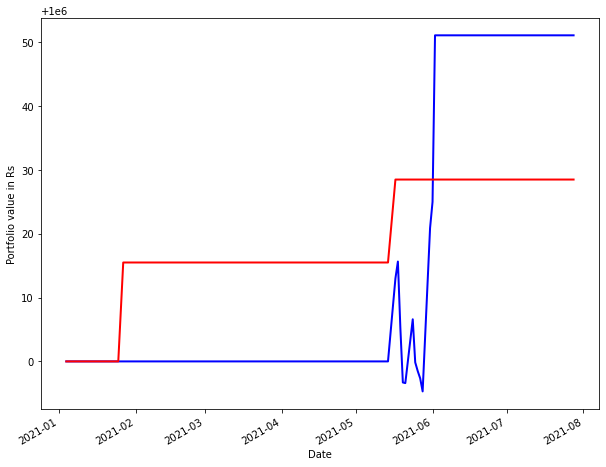

In [650]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in Rs')

# Plot the equity curve in dollars

portfolio_1['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'b')

portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10,8), color = 'r')

In [651]:
model.save('model_3_5_wav.h5')